## importing libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Feature Scaling
from sklearn.preprocessing import LabelEncoder , StandardScaler

# Machine Learning Models
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

# Model Evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings("ignore")

## Load dataset from file

In [4]:
# Load the dataset (Assuming CSV format)
df = pd.read_csv(r"C:\Users\lakshita\Desktop\datasets\mobile_phone_pricing.csv")

## Data Processing

In [6]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [7]:
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [9]:
df['price_range'].value_counts()

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

## Checking NULL values

In [11]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

# Visualization {Exploratory Data Analysis (EDA)}

## Price Range Distribution

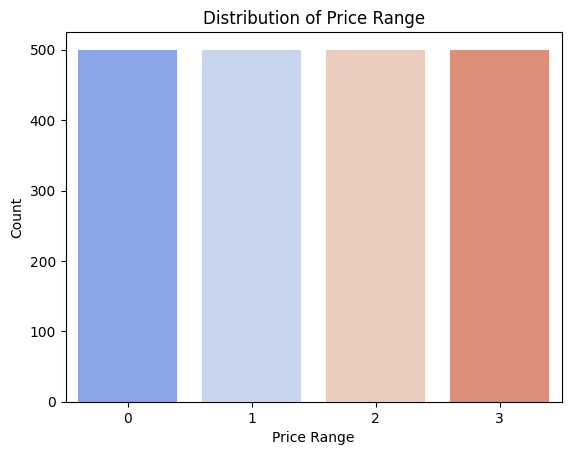

In [14]:
# Plot the count of each price range
sns.countplot(x=df['price_range'], palette="coolwarm")
plt.xlabel("Price Range")
plt.ylabel("Count")
plt.title("Distribution of Price Range")
plt.show()

## RAM vs Price Range

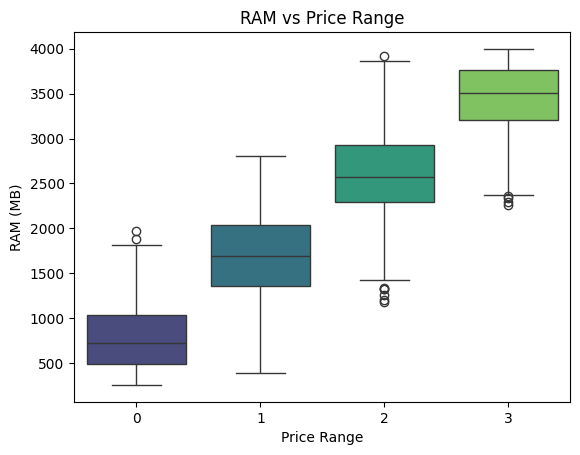

In [16]:
# Boxplot of RAM vs Price Range
sns.boxplot(x=df['price_range'], y=df['ram'], palette="viridis")
plt.xlabel("Price Range")
plt.ylabel("RAM (MB)")
plt.title("RAM vs Price Range")
plt.show()

## Battery Power vs Price Range

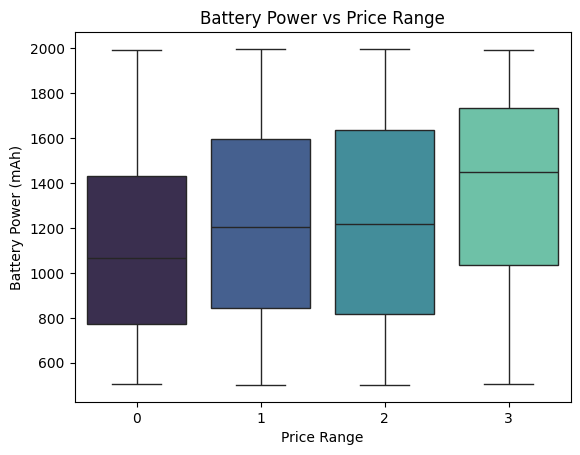

In [18]:
# Boxplot of Battery Power vs Price Range
sns.boxplot(x=df['price_range'], y=df['battery_power'], palette="mako")
plt.xlabel("Price Range")
plt.ylabel("Battery Power (mAh)")
plt.title("Battery Power vs Price Range")
plt.show()

## Pixel Resolution vs Price Range

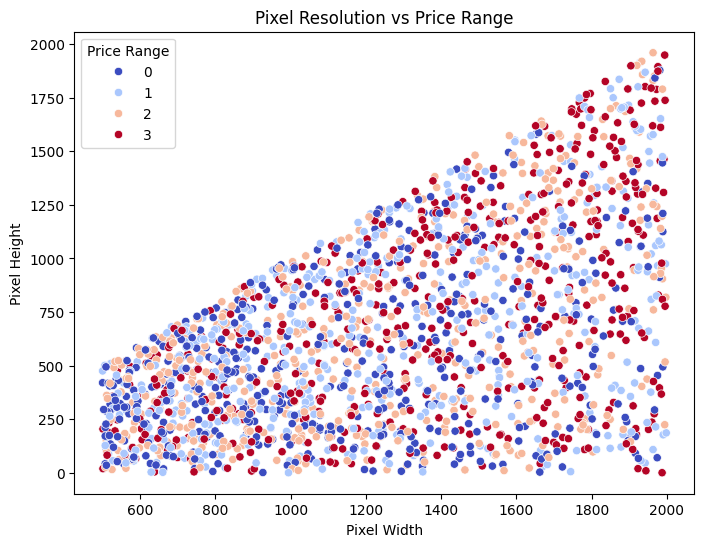

In [20]:
# Scatter plot of pixel resolution width vs height
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['px_width'], y=df['px_height'], hue=df['price_range'], palette="coolwarm")
plt.xlabel("Pixel Width")
plt.ylabel("Pixel Height")
plt.title("Pixel Resolution vs Price Range")
plt.legend(title="Price Range")
plt.show()

# Featuring Engineering 
## Handling Categorical Features (Label Encoding)

In [22]:
# Define categorical columns to encode
categorical_cols = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']

# Apply Label Encoding
encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

##  Feature Scaling (Standardization)

In [24]:
# Define numerical columns to scale
numerical_cols = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 
                  'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']

# Apply Standard Scaling
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


## Correlation Matrix

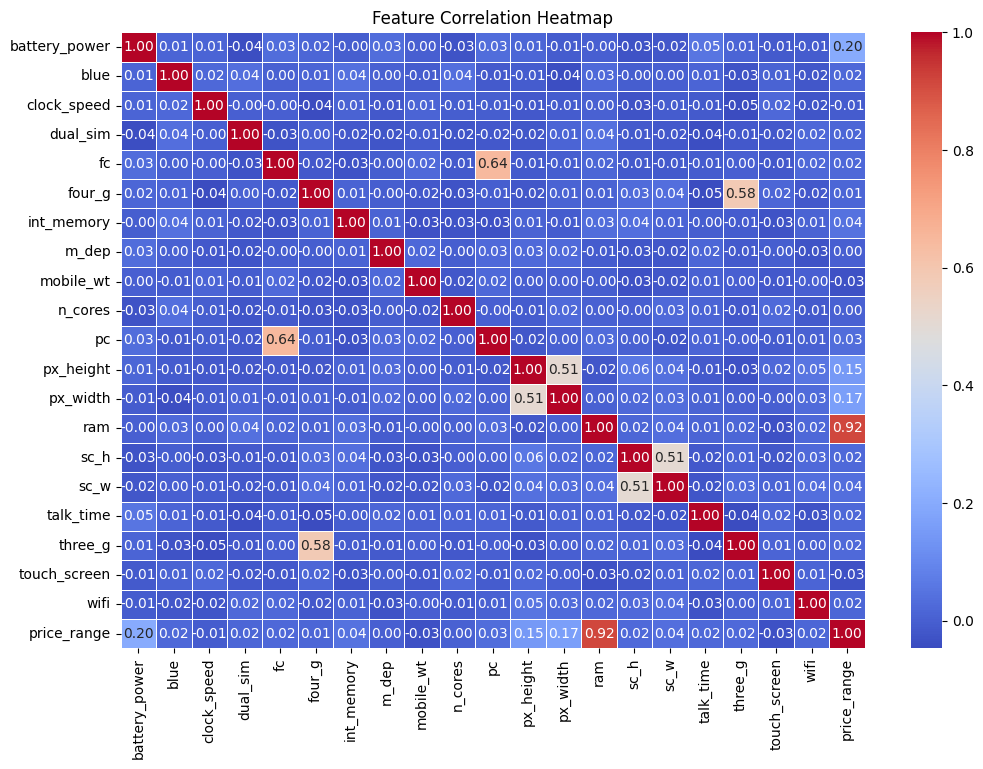

In [26]:
# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap to check feature relationships
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

## ML model implementation

In [28]:
# Define Features and Target Variable
X = df.drop(columns=['price_range'])  # Features
y = df['price_range']  # Target variable (0 = low, 1 = medium, 2 = high, 3 = very high)

# Split dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Model Training

## 1. Random Forest Classifier

In [31]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [32]:
y_pred_rf = rf.predict(X_test)

## Evaluation

In [34]:
print("* Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", rf_accuracy)

* Random Forest Performance:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       100
           1       0.83      0.83      0.83       100
           2       0.81      0.80      0.80       100
           3       0.93      0.93      0.93       100

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400

Accuracy: 0.88


## Confusion Matrix

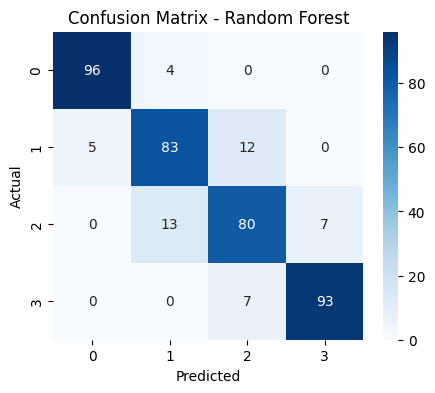

In [36]:
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

## 2. XGBoost Classifier

In [38]:
# Train model
xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [39]:
# Predictions
y_pred_xgb = xgb.predict(X_test)

## Evaluation

In [41]:
print("* XGBoost Performance:")
print(classification_report(y_test, y_pred_xgb))
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print("Accuracy:",xgb_accuracy  )

* XGBoost Performance:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       100
           1       0.91      0.91      0.91       100
           2       0.88      0.88      0.88       100
           3       0.95      0.92      0.93       100

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400

Accuracy: 0.9225


## Confusion Matrix

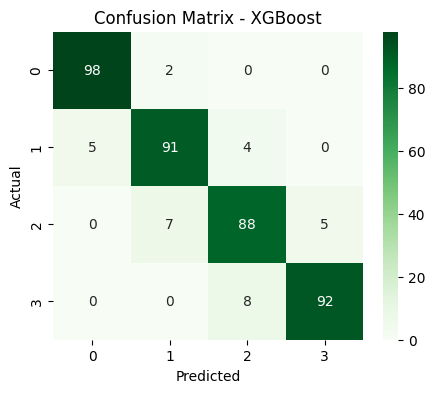

In [43]:
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap="Greens")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost")
plt.show()

## 3. Support Vector Machine (SVM)

In [45]:
# Train model
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)


SVC(kernel='linear', random_state=42)

In [46]:
y_pred_svm = svm.predict(X_test)

## Evaluation

In [48]:
print("* SVM Performance:")
print(classification_report(y_test, y_pred_svm))
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", svm_accuracy)

* SVM Performance:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       100
           1       0.96      0.95      0.95       100
           2       0.95      0.95      0.95       100
           3       0.96      0.99      0.98       100

    accuracy                           0.96       400
   macro avg       0.97      0.97      0.96       400
weighted avg       0.97      0.96      0.96       400

Accuracy: 0.965


## Confusion Matrix

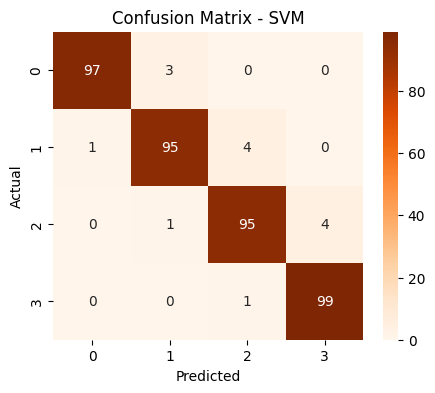

In [50]:
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap="Oranges")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM")
plt.show()

# **Final Model Comparison Table**

** Final Model Comparison:
           Model  Accuracy
0  Random Forest    0.8800
1        XGBoost    0.9225
2            SVM    0.9650


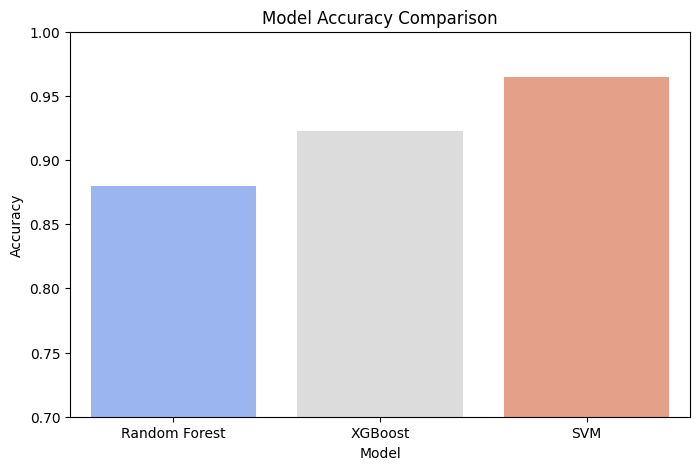

In [82]:
# Create a DataFrame with final accuracy scores
comparison_df = pd.DataFrame({
    "Model": ["Random Forest", "XGBoost", "SVM"],
    "Accuracy": [rf_accuracy, xgb_accuracy, svm_accuracy]
})

# Display results
print("** Final Model Comparison:")
print(comparison_df)

# Plot Accuracy Comparison
plt.figure(figsize=(8, 5))
sns.barplot(x="Model", y="Accuracy", data=comparison_df, palette="coolwarm")
plt.title("Model Accuracy Comparison")
plt.ylim(0.7, 1)  # Set y-axis limit for better visibility
plt.ylabel("Accuracy")
plt.show()
